In [1]:
pip install pandas matplotlib riskfolio-lib

In [5]:
import sys
import os

repo_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_path)

In [3]:
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt

In [4]:
# Load returns
returns = pd.read_csv(os.path.join('..','data','only_first_2_years_returns.csv'))
returns.set_index('open_time', inplace=True)
print(returns.shape)
returns.head()

(730, 17)


,ADAUSDT,BNBUSDT,BTCUSDT,EOSUSDT,ETCUSDT,ETHUSDT,ICXUSDT,IOTAUSDT,LTCUSDT,NEOUSDT,NULSUSDT,ONTUSDT,QTUMUSDT,TRXUSDT,VETUSDT,XLMUSDT,XRPUSDT
open_time,,,,,,,,,,,,,,,,,
2019-01-02,0.055979,0.010015,0.016175,0.076879,0.012947,0.092811,0.035153,0.059247,0.037802,0.018437,0.025519,0.062511,0.035891,0.023859,0.012249,0.026870,0.022228
2019-01-03,-0.051432,-0.041828,-0.023786,-0.064475,-0.060489,-0.037563,0.026768,-0.035285,-0.039180,-0.047728,-0.029763,-0.057247,-0.064530,-0.004053,-0.039206,-0.044355,-0.044520
2019-01-04,0.022830,0.029545,0.006698,0.013837,0.038254,0.038756,0.047471,-0.004606,0.011787,-0.008907,0.018356,0.005719,0.020833,0.071211,0.013350,0.011850,0.001930
2019-01-05,0.023715,-0.001122,-0.005551,-0.008750,-0.025629,0.005659,-0.020059,-0.013337,0.080919,0.035815,0.038765,0.030273,0.000000,0.039886,-0.006214,-0.010913,-0.012943
2019-01-06,0.095162,0.051371,0.057450,0.059676,0.064987,0.006740,0.068613,0.021517,0.115642,0.095960,0.033991,0.039448,0.039002,0.026941,0.061781,0.064855,0.034174


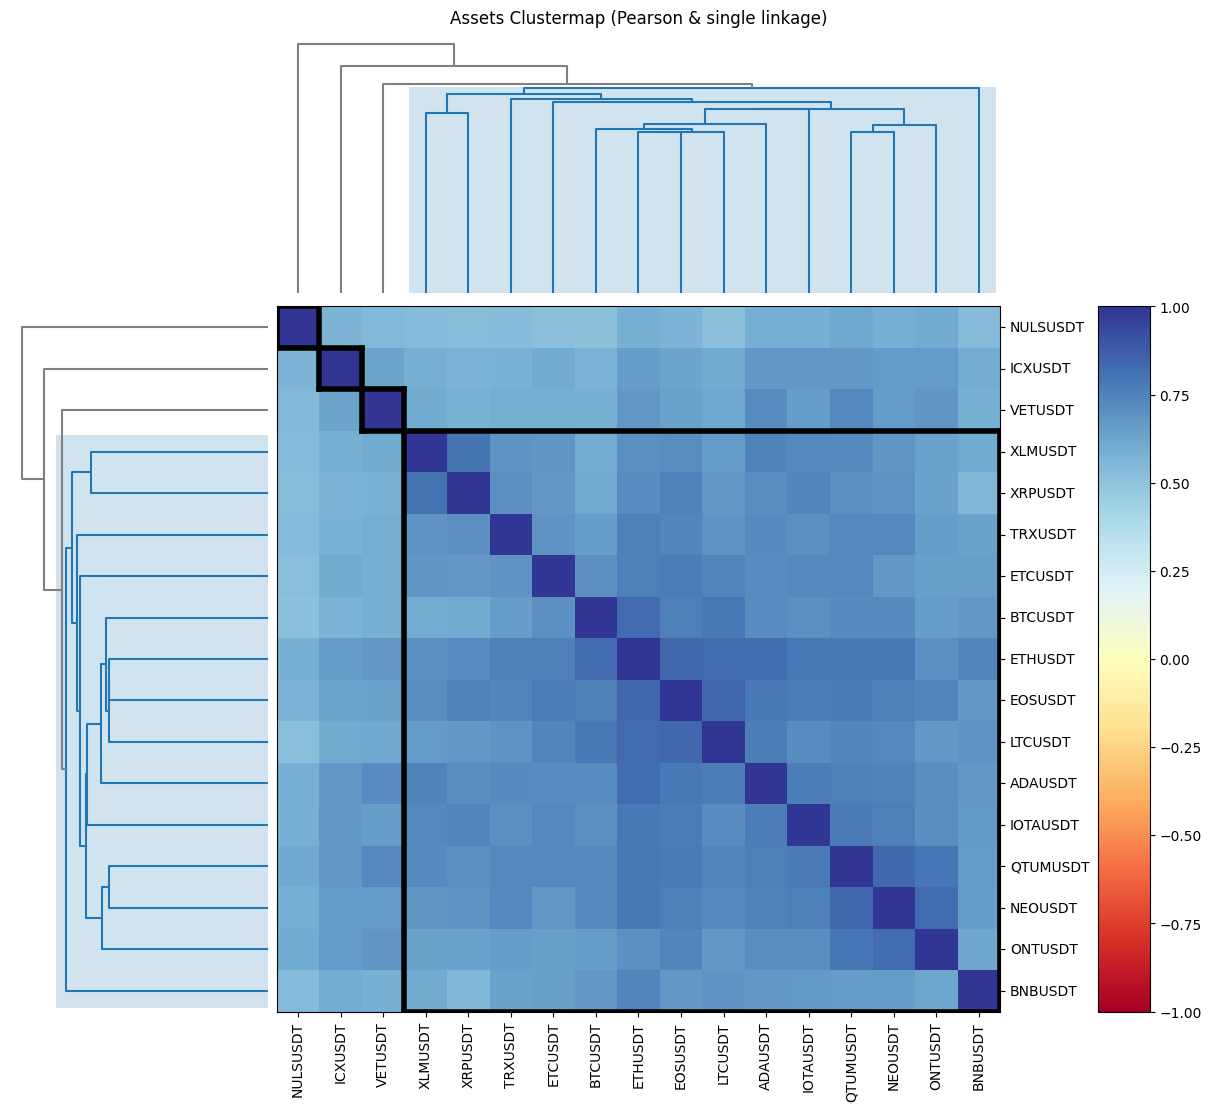

In [5]:
# Create portfolio object
port = rp.Portfolio(returns=returns)

# Plot correlation matrix with dendrogram
ax = rp.plot_clusters(
    returns=returns,                   # DataFrame of asset returns to analyze correlations
    codependence='pearson',            # correlation coefficient method to use; possible values: 'pearson', 'spearman', 'abs_pearson', 'abs_spearman', 'distance', 'mutual_info', 'tail', 'custom_cov'
    linkage='single',                  # linkage method for hierarchical clustering; possible values: 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward', 'DBHT'
    k=None,                            # number of clusters, None means no clustering
    max_k=len(returns.columns),        # max number of clusters to test when k is None
    leaf_order=True,                   # whether to reorder leaves for optimal visualization
    dendrogram=True,                   # whether to show dendrogram visualization
    cmap='RdYlBu',                     # colormap for correlation heatmap visualization
    linecolor='black',                 # color of dendrogram lines
    ax=None                            # custom axis for plot, None creates new
)

plt.show()